# Notebook 19: Small Sample Tests for Mean and Variance of Normal Populations
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - The Sampling Distribution for the Variance of a Normal Population 
*** 

We saw some time ago that the sample mean of a normal population itself has a normal distribution.  In this exercise we'll explore the sampling distribution of the sample variance from a normal population.  

**Part A**: The following function draws many samples of size $n$ from $N(\mu, \sigma^2)$ and plots a histogram of the resulting sample means.  Run the code a few times and verify that the sampling distribution does appear normal, even for small sample sizes.  

/Users/rachelcox/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


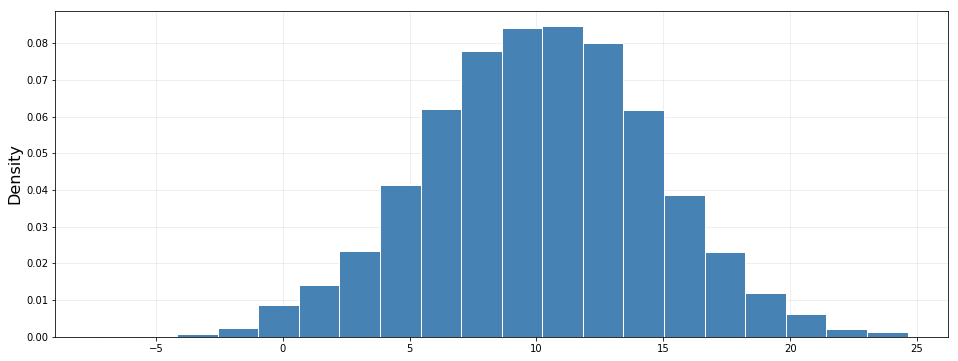

In [2]:
def sampling_dist(num_tests=5000, sample_size=10, mu=5, sig=2): 
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    xbars = np.array([np.mean(stats.norm.rvs(mu, sig, size=sample_size)) for ii in range(num_tests)])
    pd.Series(xbars).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, normed=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
sampling_dist(num_tests=5000, sample_size=5, mu=10, sig=10)

**Part B**: Modify the code above so that it plots a histogram of the **sample variance** of samples from $N(\mu,\sigma^2)$.  Experiment with the parameters $\mu$, $\sigma$, and _in-particular_ the sample size (starting with values of $n \approx 5$). Describe the resulting distributions. 

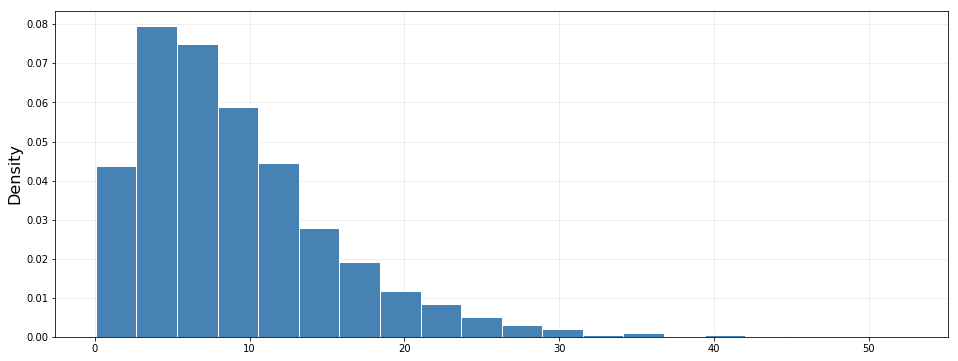

In [3]:
def sampling_dist(num_tests=5000, sample_size=10, mu=5, sig=2): 
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    xbars = np.array([np.var(stats.norm.rvs(mu, sig, size=sample_size),ddof=1) for ii in range(num_tests)])
    pd.Series(xbars).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, normed=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
sampling_dist(num_tests=5000, sample_size=5, mu=3, sig=3)

**Part C**: Modify the code above so that it simulates $(n-1)S^2/\sigma^2$, creates the histogram, and then overlays the associated density function of the proper $\chi^2_\nu$ distribution (obtained from scipy.stats.chi2). 

**Hint**: If you're using np.var to compute the sample variance, know that it takes an optional argument ddof that determines the denominator that divides the sum of squared deviations.  Passing in ddof=1 will give the traditional sample variance. 

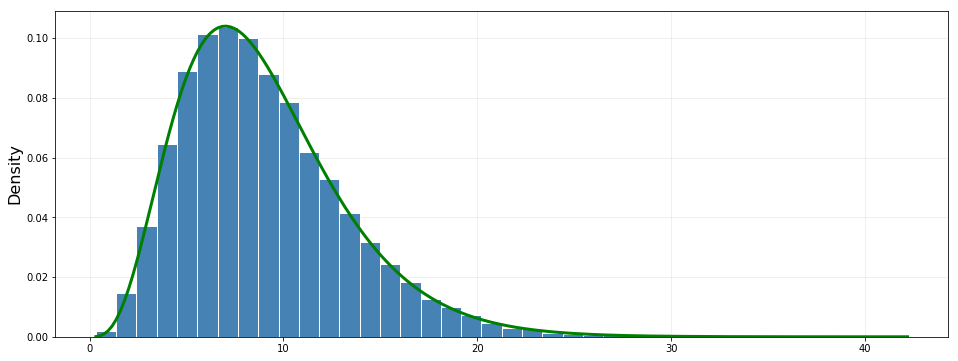

In [4]:
def sampling_dist(num_tests=5000, sample_size=10, mu=5, sig=2): 
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    xbars = np.array([(sample_size-1)*np.var(stats.norm.rvs(mu, sig, size=sample_size),ddof=1)/(sig*sig) for ii in range(num_tests)])
    pd.Series(xbars).hist(ax=ax, color="steelblue", edgecolor="white", bins=40, normed=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylabel("Density", fontsize=16)
    
    xplot = np.linspace(np.min(xbars), np.max(xbars), 200)
    pdf = stats.chi2.pdf(xplot,sample_size-1)
    ax.plot(xplot, pdf, color="green", lw=3)
    
sampling_dist(num_tests=50000, sample_size=10, mu=3, sig=3)

### Exercise 2 - Small Sample vs Bootstrapped Confidence Intervals 
*** 

In this exercise you will compare the confidence intervals achieved using the small-sample techniques discussed in class and empirical bootstrapped confidence intervals. For all tests we will use a random sample of size $n=10$ from the normal population distribution with parameters $\mu=5$ and $\sigma=2$.  

In [5]:
mu, sig, n, alpha = 5, 2, 10, 0.05
x = stats.norm.rvs(mu, sig, size=n)

**Part A**: Compute a 95% t-confidence interval for the population mean based on the sample mean.  

From class, we know that a t-confidence interval for hte mean is:

$$[\bar{x} - t_{1-\alpha/2,n-1} \dfrac{s}{\sqrt{n}}, \bar{x} + t_{1-\alpha/2,n-1} \dfrac{s}{\sqrt{n}}\big]\bigg]\Bigg]$$

In [6]:
mean_t_CI = [np.mean(x) + pm*stats.t.ppf(1-alpha/2, n-1)*np.std(x, ddof=1)/np.sqrt(n) for pm in [-1,1]]
print("t-CI for mean: [{:.3f}, {:.3f}]".format(mean_t_CI[0], mean_t_CI[1]))

t-CI for mean: [3.561, 5.755]


**Part B**: Computed an empirical bootstrapped 95% confidence interval for the population mean using the same sample used in **Part A**.  How do the confidence intervals compare?  Do they both cover the true mean of $\mu=5$?  Are they approximately the same width? 

In [7]:
num_boots=10000
boot_means = np.array([np.mean(np.random.choice(x, replace=True, size=n)) for ii in range(num_boots)])
mean_b_CI = [np.percentile(boot_means, 100*alpha/2), np.percentile(boot_means, 100*(1-alpha/2))]
print("b-CI for mean: [{:.3f}, {:.3f}]".format(mean_b_CI[0], mean_b_CI[1]))

b-CI for mean: [3.838, 5.588]


Both the t-confidence interval and the bootstrapped confidence interval cover the true mean $\mu=5$.  The t-confidence interval is slightly wider than the bootstrapped confidence interval.  In general, for a sample size this small, the t-confidence interval has better coverage properties than the bootstrapped confidence interval. 

**Part C**: Compute a 95% confidence interval for the population variance based on the $\chi^2$ distribution using the same sample used in **Part A**. 

In [8]:
var_c_CI = [(n-1)*np.var(x, ddof=1)/c for c in [stats.chi2.ppf(1-alpha/2, n-1), stats.chi2.ppf(alpha/2, n-1)]]
print("c-CI for var: [{:.3f}, {:.3f}]".format(var_c_CI[0], var_c_CI[1]))

c-CI for var: [1.112, 7.832]


**Part D**: Computed an empirical bootstrapped 95% confidence interval for the population variance using the same sample as in **Part A**.  How do the confidence intervals compare?  Do they both cover the true variance of $\sigma^2=4$?  Are they approximately the same width? 

In [9]:
num_boots=10000
boot_vars = np.array([np.var(np.random.choice(x, replace=True, size=n), ddof=1) for ii in range(num_boots)])
var_b_CI = [np.percentile(boot_vars, 100*alpha/2), np.percentile(boot_vars, 100*(1-alpha/2))]
print("b-CI for var: [{:.3f}, {:.3f}]".format(var_b_CI[0], var_b_CI[1]))

b-CI for var: [0.498, 3.751]


Both the $\chi^2$-confidence interval and the bootstrapped confidence interval cover the true variance of $\sigma^2=4$.  The $\chi^2$-confidence interval is significantly wider than the bootstrapped confidence interval.  In general, for a sample size this small, the $\chi^2$-confidence interval has better coverage properties than the bootstrapped confidence interval. 